In [16]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")
import os
os.chdir('/content/gdrive/My Drive/SRGAN_Pytorch_HTM')
_path = os.getcwd()
_path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/SRGAN_Pytorch_HTM'

In [0]:
from SRGAN import G_Net, D_Net
import torch.backends.cudnn as cudnn
from dataset_h5 import Read_dataset_h5
from torch.utils.data import DataLoader
from PIL import Image
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
G = G_Net().eval().float()
checkpoint = torch.load('checkpoint/SRGAN_Adam_epoch_10.tar')
G.load_state_dict(checkpoint['G_Net_state_dict'])
G = G.cpu()

In [0]:
test_img = cv2.imread('data/Test/Set5/head_GT.bmp')
input_img = torch.tensor(test_img.reshape(1,3,test_img.shape[0],test_img.shape[1])/255)

In [0]:
output = G(input_img.float())

In [21]:
output_img = output*255
output_img = output_img.int().detach().numpy()
output_img = output_img.reshape(output_img.shape[2],output_img.shape[3],output_img.shape[1])
cv2.imwrite('result/head_epoch_10.png', output_img)

True

Text(0.5, 1.0, 'output_img(SRGAN)')

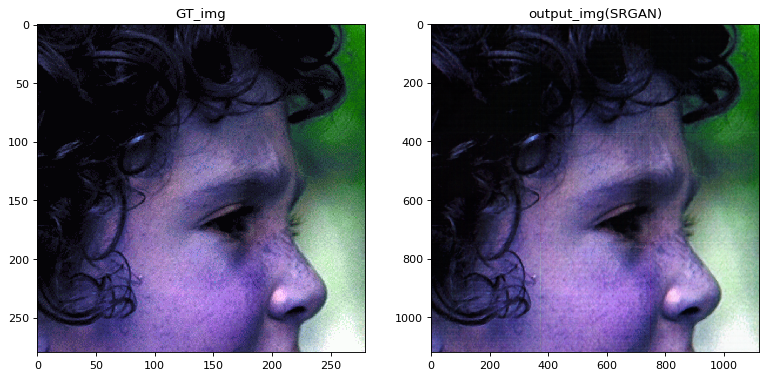

In [22]:
fig = plt.figure(figsize=(18, 16), dpi= 80)
ax = plt.subplot("131")
ax.imshow(test_img)
ax.set_title("GT_img")

ax = plt.subplot("132")
ax.imshow(output_img)
ax.set_title("output_img(SRGAN)")